In [0]:
#@title Library imports
!pip install -q scikit-bio
!pip install -q biopython

import io

from matplotlib import pyplot as plt
import numpy as np

import scipy
from scipy.cluster import hierarchy
import skbio
from Bio import Phylo
from Bio.Phylo import TreeConstruction


def delItem(condensed, idx):
  m = scipy.spatial.distance.squareform(condensed)
  removed = []
  for i, row in enumerate(m):
    if i == idx:
      continue

    row = m[i]
    rRow = np.delete(row, idx)
    removed.append(rRow)
  
  remC = scipy.spatial.distance.squareform(removed)
  remC = remC.tolist()
  return remC


def delName(labels, condensed, name):
  idx = labels.index(name)
  del labels[idx]
  removed = delItem(condensed, idx)
  return labels, removed

  
def cluster(labels, y, method, exponent, link_color_func):
  # Generate the linkage matrix
  Z = hierarchy.linkage(y, method, optimal_ordering=True)
  
  # Make cluster distance in Z smaller to make dendrogram easier to read.
  cdist = Z[:, 2]
  normed = np.power(cdist, exponent)
  Z[:, 2] = normed
  
  # Plot dendrogram
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
  ax.set_xticks([])
  hierarchy.dendrogram(
      Z,
      labels=labels,
      count_sort="descendent",
      orientation="left",
      link_color_func=link_color_func,
      leaf_font_size=24,
      ax=ax,
  )
  plt.show()
  
  
def biopyNJ(labels, y, margin):
  # Construct the tree.
  fullDM = scipy.spatial.distance.squareform(y)
  lowerTri = []
  for i, row in enumerate(fullDM):
    lowerTri.append(row[:i+1].tolist())
  dm = Phylo.TreeConstruction.DistanceMatrix(labels, lowerTri)
  tree = TreeConstruction.DistanceTreeConstructor().nj(dm)
  
  # Decrease the length of the leaves to make graph easier to read.
  minL = np.finfo(float).max
  for clade in tree.find_clades():
    if not clade.is_terminal():
      continue
    if clade.branch_length < minL:
      minL = clade.branch_length
  for clade in tree.find_clades():
    if not clade.is_terminal():
      continue
    clade.branch_length += (-minL) + margin
  
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
  Phylo.draw(tree, axes=ax)

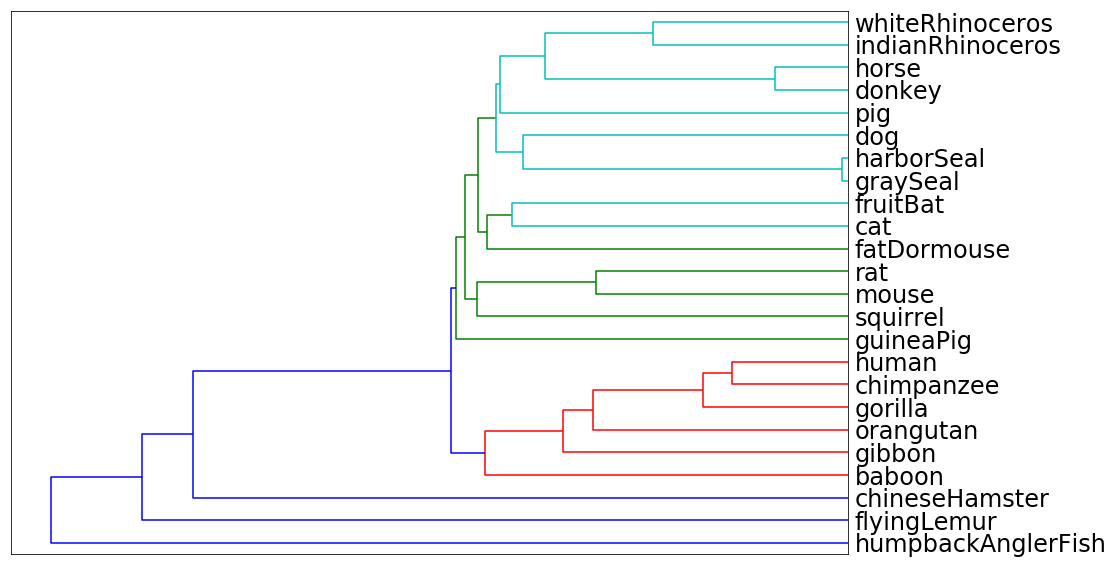

In [2]:
#@title gzip on DNA text
labels = ["baboon","cat","chimpanzee","cricetulusGriseus","cynocephalusVariegatus","dog","donkey","fatDormouse","fruitBat","gibbon","gorilla","graySeal","guineaPig","harborSeal","horse","human","indianRhinoceros","melanocetusJohnsonii","mouse","orangutan","pig","rat","squirrel","whiteRhinoceros"]
y = [0.8599300570587153,0.8480428360413589,0.8993722304283605,0.8945716395864106,0.8546661748432313,0.8546898079763663,0.8581979320531757,0.853397341211226,0.8471196454948301,0.8471196454948301,0.8561669128508124,0.8579827301120706,0.8554283604135894,0.8550590841949779,0.8493353028064993,0.8528434268833087,0.904357459379616,0.8539512555391433,0.8465657311669128,0.8556129985228951,0.8596750369276218,0.861890694239291,0.8561669128508124,0.8477820725197865,0.8899318976624333,0.8890115958034235,0.8400515369041045,0.8433646235965396,0.8485183140069943,0.842076200993926,0.8510951592122216,0.8463095895453708,0.8444689858273514,0.8486128972992835,0.8477820725197865,0.8396834161605007,0.8545923062764587,0.849622676237806,0.9041045462911835,0.8481501932633904,0.853303883673845,0.8453892876863611,0.8448371065709552,0.8464936499171728,0.8426283821093319,0.8941916389197189,0.8934517203107658,0.8559572113611214,0.853496115427303,0.8516260162601627,0.8483727810650887,0.8303736588975212,0.7859785423603404,0.855715871254162,0.858166452324086,0.8540510543840177,0.845541990381058,0.7708102108768036,0.8562708102108768,0.9032556418793932,0.8551609322974473,0.8281539030706623,0.8522012578616353,0.8553459119496856,0.8510913799482057,0.8568257491675916,0.933855859300325,0.8898930284028034,0.8917917361497129,0.8896895787139689,0.8855399408284024,0.8897113249444856,0.8907735321528425,0.8948736998514116,0.893441117031049,0.8947076239822354,0.8887648809523809,0.8947953324689757,0.894473293768546,0.9405051449953228,0.872806189847141,0.8931111943092475,0.8929236499068901,0.8730638458632414,0.8901303538175046,0.8934076137418756,0.8933972703799336,0.8925328886418381,0.8965262379896526,0.8888683431952663,0.8954478164322723,0.8937558247903076,0.900074294205052,0.8965643946353115,0.9039600296076981,0.8911830357142857,0.8990553806260418,0.8859421364985163,0.9451824134705332,0.8945083978109077,0.8931111943092475,0.892364990689013,0.898753305629014,0.8947858472998138,0.8898792943361189,0.8511619328661011,0.850424197713021,0.8513463666543711,0.8603836222796016,0.8568793803024715,0.8402803393581704,0.8495315083593606,0.8395426042050904,0.8458133530062707,0.8559572113611214,0.8522685355957211,0.9035411287347842,0.8574326816672815,0.8590925857617115,0.8552194762080413,0.8563260789376613,0.8552194762080413,0.8515308004426411,0.8531042128603105,0.8498520710059172,0.8530717986676536,0.8534370946822308,0.8438021122846026,0.8555943413558699,0.8493708364174686,0.7409672040022235,0.860344508242267,0.8375023161015379,0.9040207522697795,0.8560311284046692,0.8606633314804522,0.849360755975542,0.8573281452658884,0.8560311284046692,0.8376876042245692,0.8460827790096083,0.8542128603104213,0.8523651145602366,0.8514412416851441,0.8530222303876539,0.8499630450849963,0.8488543976348855,0.8543976348854397,0.8497782705099778,0.9048410938654841,0.8492239467849224,0.8538433111603844,0.8531042128603105,0.8501478196600147,0.8486696230598669,0.8551367331855136,0.8555843195266272,0.8498520710059172,0.8559541420118343,0.8504501194194378,0.8552144970414202,0.8505917159763313,0.8559541420118343,0.8470784023668639,0.9029215976331361,0.8542899408284024,0.8568786982248521,0.8465236686390533,0.8624260355029586,0.8537352071005917,0.8535502958579881,0.8279052553663953,0.8565877128053294,0.8539408414477311,0.8532568467801629,0.8449296817172465,0.8279052553663953,0.8530717986676536,0.9009992598075499,0.8580680977054034,0.8369726128793487,0.8541820873427091,0.8549222797927462,0.8514063656550703,0.850481125092524,0.8547548291233283,0.851368730479515,0.8564026646928201,0.8502604166666666,0.7840340803852566,0.8481083086053413,0.9006523765144455,0.851071761416589,0.819757688723206,0.8504655493482309,0.8518173345759553,0.8521415270018622,0.8475394614670381,0.8508175638434686,0.6030717986676536,0.8400817236255572,0.8544174847193925,0.8410608308605341,0.900074294205052,0.8486255572065379,0.8471396731054978,0.8434249628528975,0.8454680534918276,0.8439821693907875,0.84661095636026,0.8489803417233144,0.8508175638434686,0.8570641190519934,0.8530222303876539,0.8998713944515891,0.8590850633841631,0.8535733970237002,0.8517361749035458,0.8579827301120706,0.8546757302957928,0.858166452324086,0.8369726128793487,0.8532568467801629,0.8391931902294597,0.9009992598075499,0.8495558845299778,0.8506661732050333,0.8390081421169504,0.846780162842339,0.8465951147298297,0.8456698741672835,0.8568253380255603,0.828820474777448,0.9002976190476191,0.8573288690476191,0.8575148809523809,0.8441220238095238,0.8510044642857143,0.8508184523809523,0.8360259981429898,0.8534913872939434,0.9053528431190961,0.8525652898684941,0.820892757918133,0.8518244119281349,0.8546027042044824,0.851639192443045,0.8514539729579552,0.9028189910979229,0.8549703264094956,0.8512611275964391,0.8460682492581603,0.8553412462908012,0.8455118694362018,0.8048961424332344,0.8991580916744621,0.8989710009354537,0.8981378026070763,0.9002806361085126,0.8962756052141527,0.9008356545961003,0.8517409210033695,0.8499068901303538,0.8222306095489715,0.8465549348230913,0.8488393686165274,0.85512104283054,0.8558592287532759,0.8541899441340782,0.8581244196843083,0.845437616387337,0.8506517690875233,0.8391829155060353,0.8515828677839851,0.8519962859795729,0.8547818012999071]

labels[labels.index("cricetulusGriseus")] = "chineseHamster"
labels[labels.index("cynocephalusVariegatus")] = "flyingLemur"
labels[labels.index("melanocetusJohnsonii")] = "humpbackAnglerFish"

method = "average"
exponent = 12
def link_color_func(k):
  if k in [26, 27,30, 31, 38]:
    return "r"
  if k in [37, 29, 39, 40, 41, 42]:
    return "g"
  if k in [33, 24, 34, 28, 25, 32, 35, 36]:
    return "c"
  return "b"
cluster(labels, y, method, exponent, link_color_func)

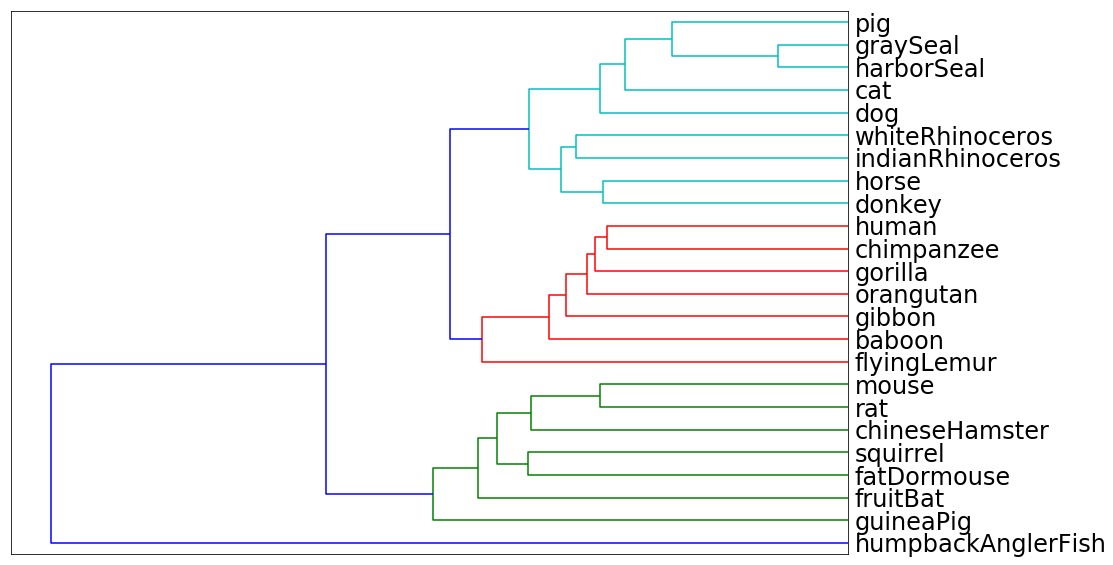

In [3]:
#@title CTW on DNA text
labels = ["baboon","cat","chimpanzee","cricetulusGriseus","cynocephalusVariegatus","dog","donkey","fatDormouse","fruitBat","gibbon","gorilla","graySeal","guineaPig","harborSeal","horse","human","indianRhinoceros","melanocetusJohnsonii","mouse","orangutan","pig","rat","squirrel","whiteRhinoceros"]
y = [0.991321118611379,0.9885172241637543,0.9962528103922058,0.990179229069482,0.9931439764936337,0.9898640296662546,0.9957531851111666,0.9940283652649913,0.9887584311766175,0.988508618536098,0.9911937377690803,0.9931840311587147,0.991455078125,0.9901185770750988,0.9880418535127056,0.9906473049470834,0.992781520692974,0.9930052460654509,0.988508618536098,0.9910802775024777,0.9917561828628528,0.9945041219085686,0.9904176904176905,0.9910800385728061,0.9908389585342333,0.990115718418515,0.9877049180327869,0.990115718418515,0.9918032786885246,0.991321118611379,0.9922854387656702,0.9910800385728061,0.9852941176470589,0.9898746383799422,0.9860173577627772,0.9896335583413693,0.9920443587270974,0.9886692381870781,0.9951876804619827,0.990115718418515,0.9927675988428158,0.9872227579556413,0.9898746383799422,0.9915621986499518,0.9884281581485053,0.9952571143285073,0.9894426712496931,0.9926542605288933,0.9891223733003708,0.9947578632051922,0.9927842746951978,0.9885172241637543,0.9872690963554668,0.9904598825831703,0.9931840311587147,0.990966796875,0.9886363636363636,0.9867962132536123,0.9896628107309869,0.9925409047160731,0.992261607588617,0.9875187219171243,0.9895936570862239,0.9895157264103844,0.9940089865202196,0.98992628992629,0.9938620181684262,0.9914299706170421,0.9933250927070457,0.9892311545204108,0.9900472754416522,0.99875,0.9959697732997481,0.9933953033268101,0.9914800389483934,0.99365234375,0.9933300395256917,0.997259591429995,0.9913856756091558,1.0026467757459094,0.9882593159775396,0.9994952044422009,0.990832507433102,0.9895514780835881,0.9899320412786308,0.9923832923832924,0.9916748285994124,0.9894426712496931,0.9936164988951632,0.9923889025288485,0.9906702676160078,0.9896881905229561,0.9902152641878669,0.9909931840311588,0.990478515625,0.9891971519764301,0.9896881905229561,0.9896881905229561,0.9944658325312801,0.9911613061625337,0.9904247483427449,0.9896881905229561,0.989933709796219,0.9931254603486374,0.989933709796219,0.9914299706170421,0.9914299706170421,0.9914299706170421,0.9943682664054848,0.992409402546523,0.9870352250489237,0.9892891918208374,0.9873046875,0.9916748285994124,0.9933888344760039,0.9909402546523016,0.9968719923002888,0.9911851126346719,0.9946131243878551,0.9860430950048972,0.9911851126346719,0.9911851126346719,0.990205680705191,0.9935723114956737,0.992583436341162,0.9896168108776267,0.9888751545117429,0.988747553816047,0.9919668938656281,0.9892578125,0.986907114624506,0.9891223733003708,0.9881860694068423,0.9951876804619827,0.9906056860321384,0.9888751545117429,0.9876390605686032,0.9888751545117429,0.992583436341162,0.9882063882063882,0.9897984573276934,0.998,0.9954921111945906,0.9953522504892368,0.991236611489776,0.995361328125,0.9933300395256917,0.9962630792227205,0.9933546640413488,1.0014436958614052,0.9892311545204108,0.9989982469321312,0.9925668979187314,0.9902329075882795,0.9889807162534435,0.9936117936117936,0.9957700920627022,0.9932819109231152,0.9938845401174168,0.9914800389483934,0.994384765625,0.9920948616600791,0.99427718337895,0.9923701698252523,0.9992781520692974,0.9900472754416522,0.9962677282906196,0.9913280475718533,0.9905449116695696,0.9900472754416522,0.9926289926289926,0.98825,0.9909491193737769,0.9944011684518014,0.991455078125,0.9901185770750988,0.9877927254608869,0.9916317991631799,0.9923002887391723,0.99525,0.9875,0.9913280475718533,0.99275,0.99675,0.990909090909091,0.9904598825831703,0.9929406037000974,0.99072265625,0.9888833992094862,0.987045341305431,0.9901550578390352,0.9920596727622714,0.993198992443325,0.9876574307304786,0.9900891972249752,0.9904282115869018,0.9939592247671785,0.98992628992629,0.990506329113924,0.977294921875,0.9889921722113503,0.9902152641878669,0.9875244618395304,0.9944658325312801,0.9914383561643836,0.9904598825831703,0.9838551859099804,0.9894814090019569,0.9946183953033269,0.9882583170254403,0.991236611489776,0.991236611489776,0.9936708860759493,0.9917234664070107,0.9968719923002888,0.9897760467380721,0.994888023369036,0.9900194741966893,0.9907497565725414,0.991236611489776,0.9914800389483934,0.9892578125,0.990966796875,0.988525390625,0.9951876804619827,0.991455078125,0.990966796875,0.98486328125,0.990234375,0.99462890625,0.98828125,0.9893774703557312,0.9879399458528181,0.9951876804619827,0.9906126482213439,0.9893774703557312,0.9878952569169961,0.9891304347826086,0.9920948616600791,0.9882063882063882,0.9901550578390352,0.9918190567853705,0.9937717987045341,0.987045341305431,0.9905847373637264,0.9905331340308918,0.9950174389636273,0.9901719901719902,0.9971126082771896,0.989908934285011,0.9908934285011075,0.9869554516367216,0.9884321929608664,0.9926162933792764,0.9877149877149877,1.0004812319538017,0.9920596727622714,0.9975938402309913,0.9980750721847931,1.0002406159769008,0.9956689124157844,0.9954568399798082,0.9888503468780971,0.9870030581039755,0.9891769443745281,0.9904176904176905,0.990832507433102,0.991670873296315,0.9972313113516235,0.990909090909091,0.9878592666005946,0.9923191278493558,0.9867321867321868,0.9904354392146992,0.9894348894348894,0.9926289926289926]

labels[labels.index("cricetulusGriseus")] = "chineseHamster"
labels[labels.index("cynocephalusVariegatus")] = "flyingLemur"
labels[labels.index("melanocetusJohnsonii")] = "humpbackAnglerFish"

method = "average"
exponent = 128
def link_color_func(k):
  if k in [39, 29, 37, 40, 42, 44]:
    return "g"
  if k in [27, 31, 32, 34, 36, 41]:
    return "r"
  if k in [28, 33, 35, 24, 25, 26, 30, 38]:
    return "c"
  return "b"
cluster(labels, y, method, exponent, link_color_func)

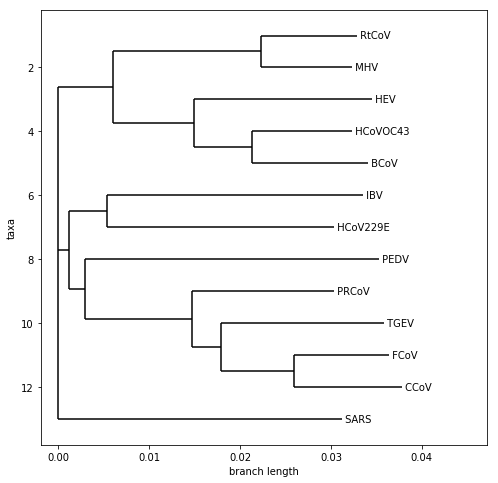

In [4]:
#@title CTW on S protein of coronaviruses
labels = ["BCoV","CCoV","FCoV","HCoV229E","HCoVOC43","HEV","IBV","MHV","PEDV","PRCoV","RtCoV","SARS","TGEV"]
y = [0.9089968976215098,0.9095634095634095,0.9057017543859649,0.8640350877192983,0.8771929824561403,0.9100877192982456,0.8934782608695652,0.9088937093275488,0.9067982456140351,0.8973799126637555,0.9057017543859649,0.9067357512953368,0.8624612202688728,0.9079627714581179,0.9069286452947259,0.9120992761116856,0.9100310237849017,0.9079627714581179,0.9027921406411582,0.8821096173733195,0.9100310237849017,0.9110651499482937,0.8779731127197518,0.9074844074844075,0.9054054054054054,0.9085239085239085,0.9106029106029107,0.9054054054054054,0.9012474012474012,0.8794178794178794,0.9074844074844075,0.9095634095634095,0.8766839378238342,0.9053905390539054,0.9061810154525386,0.8934010152284264,0.9032608695652173,0.903470715835141,0.8917274939172749,0.9050218340611353,0.9030373831775701,0.9056994818652849,0.878987898789879,0.9053905390539054,0.8945652173913043,0.9078091106290672,0.9042904290429042,0.8941048034934498,0.900990099009901,0.9067357512953368,0.9094922737306843,0.8945652173913043,0.9078091106290672,0.9094922737306843,0.8941048034934498,0.9050772626931567,0.9077720207253887,0.9043478260869565,0.9088937093275488,0.9002433090024331,0.9050218340611353,0.9030373831775701,0.9098445595854923,0.9078091106290672,0.908695652173913,0.8608695652173913,0.9054347826086957,0.9036269430051813,0.9023861171366594,0.9067245119305857,0.9067245119305857,0.9056994818652849,0.9072052401746725,0.8995327102803738,0.8746113989637305,0.9050218340611353,0.9036269430051813,0.9129533678756476]

def drawTree(skbioTree):
  # Find the minimum length at the leaves.
  minL = 999999
  for node in skbioTree.traverse():
    if not node.is_tip():
      continue
    if node.length < minL:
      minL = node.length
  
  # Decrease the length at the leaves to make the tree easier to read.
  for node in skbioTree.traverse():
    if not node.is_tip():
      continue
    node.length += (-minL + 0.01)

  bioTree = Phylo.read(io.StringIO(str(skbioTree)), "newick")
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
  Phylo.draw(bioTree, axes=ax)

  
fullDM = scipy.spatial.distance.squareform(y)
dm = skbio.DistanceMatrix(fullDM, labels)
tree = skbio.tree.nj(dm)
drawTree(tree)